# The Taylor Series
** October 2017 **

** Andrew Riberio @ [AndrewRib.com](http://www.andrewrib.com) **

In this notebook we will explore the taylor series using sympy. 

Resources:
* https://en.wikipedia.org/wiki/Series_(mathematics)
* https://en.wikipedia.org/wiki/Taylor_series

## Libraries

In [1]:
import sympy as sp
import sympy.functions.combinatorial.factorials as fact
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from decimal import *

# Pretty Latex printing for Sympy with an argument to show the polynomials the way we write them 
# from small term to larger. May give you problems if you don't have a latex distribution. 
sp.init_printing(order='rev-lex',use_latex='mathjax')

## Taylor Series
The taylor series is an intriguing power series that makes use of acending derivitives to approximate a function. 
Please see the [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series) wiki for a formal definition. Here we will implement the taylor series function and use it to approximate various functions. 

In [2]:
def taylor(fn,depth, x=None,a = None, printSteps = True):
    # If no x or a is provided, we will be symbolically computing the taylor series. 
    if(x == None):
        x = sp.symbols('x')
    if(a == None):
        a = sp.symbols('a')
    
    # The start of the taylor series 
    result = fn(a)
    
    if depth == 0:
        return result 
    elif depth > 0:
        cummulativeDYDX = fn(a)
        for i in range(depth):
            cummulativeDYDX = sp.diff(cummulativeDYDX)
            
            if(printSteps):
                print("Derivitive of order d^{0}y/dx^[0|: {1}".format(i+1,cummulativeDYDX))
                      
            result = result + (cummulativeDYDX  / fact.factorial(i+1))*(x - a)**(i+1)
                      
        return result
    else:
        # Malformed case.
        return 0

Consider the beloved Euler Number:  $e^{x}$. It has a most interesting taylor series. Let's show it here expanded to 5 steps. 

In [3]:
eTaylor5 = taylor(sp.exp,5)
eTaylor5 

Derivitive of order d^1y/dx^[0|: exp(a)
Derivitive of order d^2y/dx^[0|: exp(a)
Derivitive of order d^3y/dx^[0|: exp(a)
Derivitive of order d^4y/dx^[0|: exp(a)
Derivitive of order d^5y/dx^[0|: exp(a)


                         2  a          3  a          4  a          5  a
 a            a   (x - a) ⋅ℯ    (x - a) ⋅ℯ    (x - a) ⋅ℯ    (x - a) ⋅ℯ 
ℯ  + (x - a)⋅ℯ  + ─────────── + ─────────── + ─────────── + ───────────
                       2             6             24           120    

As we see, one of the nifty features of the $e^{x}$ is that it is equal to its derivative. Thus, when we chain higher order derivatives of $e^{x}$, we simply get the same thing ( as shown in the printout). This leads to the simplest type of taylor series, as the derivitive term remains constant. 

So what does this taylor series of $e^{x}$ look like with only 5 terms? We will make use of sympy's symbolic computation abilities to substitute in values for x and a.

In the case of a = 0, we get:

In [4]:
x, a = sp.symbols('x a')
eTaylor5_0 = eTaylor5.subs(a,0)
eTaylor5_0 

         2    3    4     5
        x    x    x     x 
1 + x + ── + ── + ── + ───
        2    6    24   120

** Theorem **: When we let a = 0, and x = 1, the taylor series as its number of terms approaches infinity = $e$ and is [the definition of $e$](https://en.wikipedia.org/wiki/Exponential_function).

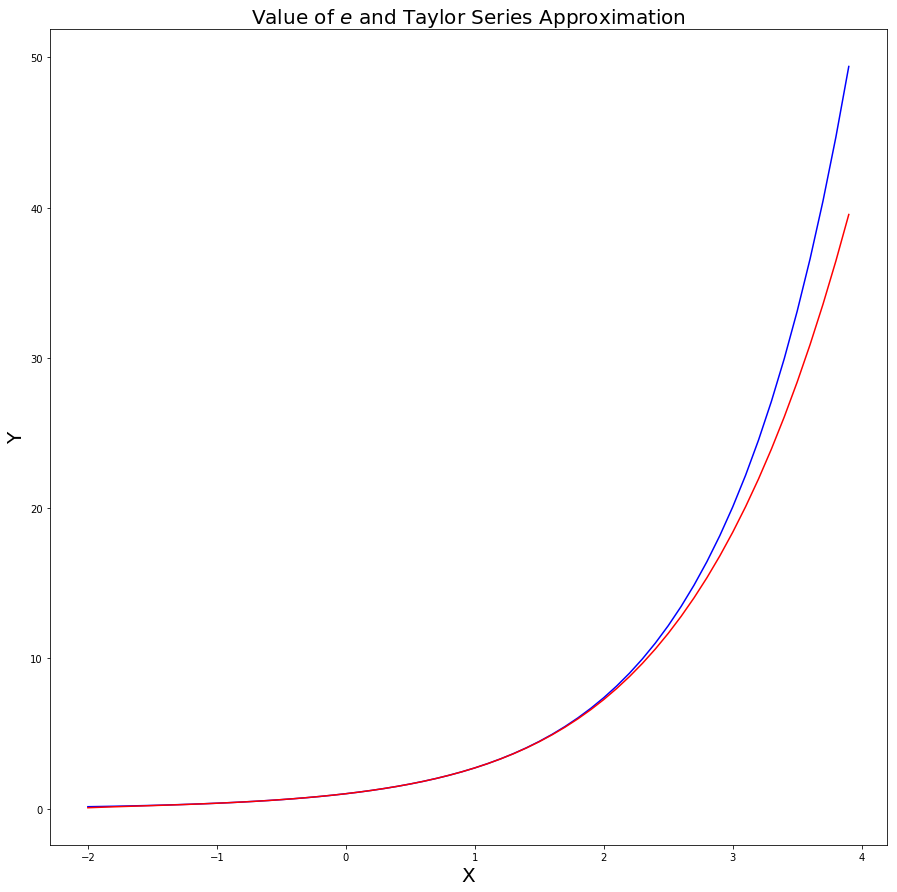

In [19]:
xs      = np.arange(-2,4,0.1)
ys      = np.exp(xs)
yTaylor = []

for xi in xs:
    yTaylor.append( eTaylor5_0.subs(x,xi) )
    
plt.figure(figsize=(15,15))
plt.plot(xs,ys,color = "blue")
plt.plot(xs,yTaylor,color="red")

plt.title("Value of $e$ and Taylor Series Approximation",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.xlabel("X",fontsize=20)

plt.show()

As we see here, due to only having 5 terms in our taylor series, we get an approximation of $e^x$ with some error. As we increase our number of terms in our taylor series, we increase the approximation precision. 

Let's see what the value of $e$ is in our taylor series and compare that to what numpy defines $e$ as:

In [6]:
res        = eTaylor5_0.subs(x,1)
decimalVal = res.p/res.q
npE        = np.exp(1)

print("Our approximated e value: {0}".format(res.p/res.q) )
print("Numpy's approximated e value: {0}".format(npE))
print("Error: {0}".format(npE - decimalVal))

Our approximated e value: 2.716666666666667
Numpy's approximated e value: 2.718281828459045
Error: 0.0016151617923783057


Let's beef up our taylor series to include more terms instead of the measly five we've been dealing with. We will produce 100 taylor series with a = 0, starting with a one termed taylor series to a 100 termed one. 

In [7]:
taylors = []
for i in range(1,101):
    taylors.append(taylor(sp.exp,i,printSteps=False))
    taylors[i-1] = taylors[i-1].subs(a,0)

We can pretty print one of the taylor series in the list by:

In [8]:
taylors[4]

         2    3    4     5
        x    x    x     x 
1 + x + ── + ── + ── + ───
        2    6    24   120

In [9]:
# Showing the first ten taylors. There must be a better way to pretty print this. 
for i in range(0,10):
    display(taylors[i])

1 + x

         2
        x 
1 + x + ──
        2 

         2    3
        x    x 
1 + x + ── + ──
        2    6 

         2    3    4
        x    x    x 
1 + x + ── + ── + ──
        2    6    24

         2    3    4     5
        x    x    x     x 
1 + x + ── + ── + ── + ───
        2    6    24   120

         2    3    4     5     6
        x    x    x     x     x 
1 + x + ── + ── + ── + ─── + ───
        2    6    24   120   720

         2    3    4     5     6     7 
        x    x    x     x     x     x  
1 + x + ── + ── + ── + ─── + ─── + ────
        2    6    24   120   720   5040

         2    3    4     5     6     7       8 
        x    x    x     x     x     x       x  
1 + x + ── + ── + ── + ─── + ─── + ──── + ─────
        2    6    24   120   720   5040   40320

         2    3    4     5     6     7       8       9  
        x    x    x     x     x     x       x       x   
1 + x + ── + ── + ── + ─── + ─── + ──── + ───── + ──────
        2    6    24   120   720   5040   40320   362880

         2    3    4     5     6     7       8       9        10  
        x    x    x     x     x     x       x       x        x    
1 + x + ── + ── + ── + ─── + ─── + ──── + ───── + ────── + ───────
        2    6    24   120   720   5040   40320   362880   3628800

In [10]:
# Showing the first ten computed rationals given x = 1
for i in range(0,10):
    res = taylors[i].subs(x,1)
    print("Series with {0} terms: {1} = {2}".format(i,res,res.p/res.q))

Series with 0 terms: 2 = 2.0
Series with 1 terms: 5/2 = 2.5
Series with 2 terms: 8/3 = 2.6666666666666665
Series with 3 terms: 65/24 = 2.7083333333333335
Series with 4 terms: 163/60 = 2.716666666666667
Series with 5 terms: 1957/720 = 2.7180555555555554
Series with 6 terms: 685/252 = 2.7182539682539684
Series with 7 terms: 109601/40320 = 2.71827876984127
Series with 8 terms: 98641/36288 = 2.7182815255731922
Series with 9 terms: 9864101/3628800 = 2.7182818011463845


If we proceed in this fashion, by showing the value of the taylor series rational by calling res.p/res.q, we will run up against pythons default precision for floating point numbers, and it will seem like we reach a point where adding another term to the taylor series adds no further precision. Let's show this by showing the result of the taylor series with 99 vs 98 terms:

In [11]:
r1 = taylors[99].subs(x,1)
r2 = taylors[98].subs(x,1)

print("Result 1:  {0}".format(r1.p/r1.q))
print("Result 2:  {0}".format(r2.p/r2.q) )
print("Numpy exp: {0}".format(np.exp(1)))

Result 1:  2.718281828459045
Result 2:  2.718281828459045
Numpy exp: 2.718281828459045


As we see, it shows the same value for all results. This is a result of truncation. We can use a higher precision floating point object by using the Decimal class. Let's do the same thing, but use that class. 

In [12]:
r1Dec = Decimal(r1.p)/Decimal(r1.q)
r2Dec = Decimal(r1.p)/Decimal(r1.q)
npE   = Decimal(np.exp(1))

print("Result 1:  {0}".format(r1Dec))
print("Result 2:  {0}".format(r2Dec))
print("Numpy exp: {0}".format(npE))

Result 1:  2.718281828459045235360287471
Result 2:  2.718281828459045235360287471
Numpy exp: 2.718281828459045090795598298427648842334747314453125


At this point, we still don't enough precision to show the difference between the last two taylor series in our list which have 98 and 99 terms, nor can we match numpy's precision. Let's go a little deeper here. We can do arithmetic up to any precision we'd like. This is called arbitrary precision. Sympy uses a library called [mpmath](http://mpmath.org/) behind the scenes to accomplish this. 

See: http://docs.sympy.org/latest/modules/evalf.html

In [13]:
higherPrecision = sp.N(r1.p/r1.q,52)
print("No sub:    {0}".format(higherPrecision))
print("Numpy exp: {0}".format(Decimal(np.exp(1))))
print("Sub        {0}".format(sp.N(taylors[99].subs(x,1),52)))

No sub:    2.718281828459045090795598298427648842334747314453125
Numpy exp: 2.718281828459045090795598298427648842334747314453125
Sub        2.718281828459045235360287471352662497757247093699960


So this result is a bit tricky. Somewhere in our computation we are truncating results when we computer higherPrecision. It turns out, we must call the Numeric evaluation function sp.N when performing our x substitution, so that we do not truncate results when dividing during the substitution; however, if we symbolically compute the substitution of x, we get a rational approximation that is more in line with standard results ( like arriving at numpy's $e$). Sympy uses different libraries for performing different things. Namely, the numeric evaluation module sp.N uses mpmath to do arbitrary precision arithmetic, and the symbolic computation uses another module. This explains the difference in values, but since much is hidden in the nuts and bolts of the package, I cannot provide a satisfactory answer why at this time. 

As observed above, in the special case of a = 0, it transforms the series into the definition of $e$. No division or truncation happens during this substitution, so the symbolic solution should equal the numeric one. 

Here we will print the results of our taylor series' with differing precision to show how it changes the values. 

In [14]:
p = 50
print("Precision = {0}".format(p))

cntr = 0
for taylor_i in taylors:
    res = sp.N(taylor_i.subs(x,1),p)
    print("taylors[{0}]   = {1}".format(cntr,res))
    cntr+=1

Precision = 50
taylors[0]   = 2.0000000000000000000000000000000000000000000000000
taylors[1]   = 2.5000000000000000000000000000000000000000000000000
taylors[2]   = 2.6666666666666666666666666666666666666666666666667
taylors[3]   = 2.7083333333333333333333333333333333333333333333333
taylors[4]   = 2.7166666666666666666666666666666666666666666666667
taylors[5]   = 2.7180555555555555555555555555555555555555555555556
taylors[6]   = 2.7182539682539682539682539682539682539682539682540
taylors[7]   = 2.7182787698412698412698412698412698412698412698413
taylors[8]   = 2.7182815255731922398589065255731922398589065255732
taylors[9]   = 2.7182818011463844797178130511463844797178130511464
taylors[10]   = 2.7182818261984928651595318261984928651595318261985
taylors[11]   = 2.7182818282861685639463417241195018972796750574528
taylors[12]   = 2.7182818284467590023145578701134256689812245367801
taylors[13]   = 2.7182818284582297479122875948272773669599066424463
taylors[14]   = 2.7182818284589944642854695

As we see, at expansion 40 we arrive at the closest value given this precision. After 40 we see that the differences are chopped off. Let's start at expansion 40 with a higher precision.  

In [15]:
p = 100
print("Precision = {0}".format(p))

cntr = 38
for taylor_i in taylors[38:100]:
    res = sp.N(taylor_i.subs(x,1),p)
    print("taylors[{0}]   = {1}".format(cntr,res))
    cntr+=1

Precision = 100
taylors[38]   = 2.718281828459045235360287471352662497757247093698703335742056391892310837864596648186030883920472746
taylors[39]   = 2.718281828459045235360287471352662497757247093699928953181184777741734377849536405109756445884951071
taylors[40]   = 2.718281828459045235360287471352662497757247093699958846289456201786842269068681277229847313249938347
taylors[41]   = 2.718281828459045235360287471352662497757247093699959558030129330930773409335803774185087571996723758
taylors[42]   = 2.718281828459045235360287471352662497757247093699959574582238008352725296318760111323581531502462954
taylors[43]   = 2.718281828459045235360287471352662497757247093699959574958422296475951475568372755349456394218502481
taylors[44]   = 2.718281828459045235360287471352662497757247093699959574966781947323134279551697480772253613389970026
taylors[45]   = 2.718281828459045235360287471352662497757247093699959574966963678863290427464378453064053552937175842
taylors[46]   = 2.7182818284590452353602

The trend: the higher the precision, the more we can approximate without truncation, but the precision changes the overall value of the computation.

Feel free to use this section to experiment with values

In [16]:
# Define the taylor series with depth = your value. 
depth = 18
t = taylor(sp.exp,depth,printSteps = False)
t2 = t.subs(a,0)

In [17]:
# Perform the symbolic substitution with precision = p. 
p = 50
r = sp.N(t2.subs(x,1),p)

npE = Decimal(np.exp(1))
print("Result:    {0}".format(r))
print("Numpy exp: {0}".format(npE))

Result:    2.7182818284590452267081174817108696833426231358244
Numpy exp: 2.718281828459045090795598298427648842334747314453125


Plotting: 


1 + x

Plotting: 


         2
        x 
1 + x + ──
        2 

Plotting: 


         2    3
        x    x 
1 + x + ── + ──
        2    6 

Plotting: 


         2    3    4
        x    x    x 
1 + x + ── + ── + ──
        2    6    24

Plotting: 


         2    3    4     5
        x    x    x     x 
1 + x + ── + ── + ── + ───
        2    6    24   120

Plotting: 


         2    3    4     5     6
        x    x    x     x     x 
1 + x + ── + ── + ── + ─── + ───
        2    6    24   120   720

Plotting: 


         2    3    4     5     6     7 
        x    x    x     x     x     x  
1 + x + ── + ── + ── + ─── + ─── + ────
        2    6    24   120   720   5040

Plotting: 


         2    3    4     5     6     7       8 
        x    x    x     x     x     x       x  
1 + x + ── + ── + ── + ─── + ─── + ──── + ─────
        2    6    24   120   720   5040   40320

Plotting: 


         2    3    4     5     6     7       8       9  
        x    x    x     x     x     x       x       x   
1 + x + ── + ── + ── + ─── + ─── + ──── + ───── + ──────
        2    6    24   120   720   5040   40320   362880

Plotting: 


         2    3    4     5     6     7       8       9        10  
        x    x    x     x     x     x       x       x        x    
1 + x + ── + ── + ── + ─── + ─── + ──── + ───── + ────── + ───────
        2    6    24   120   720   5040   40320   362880   3628800

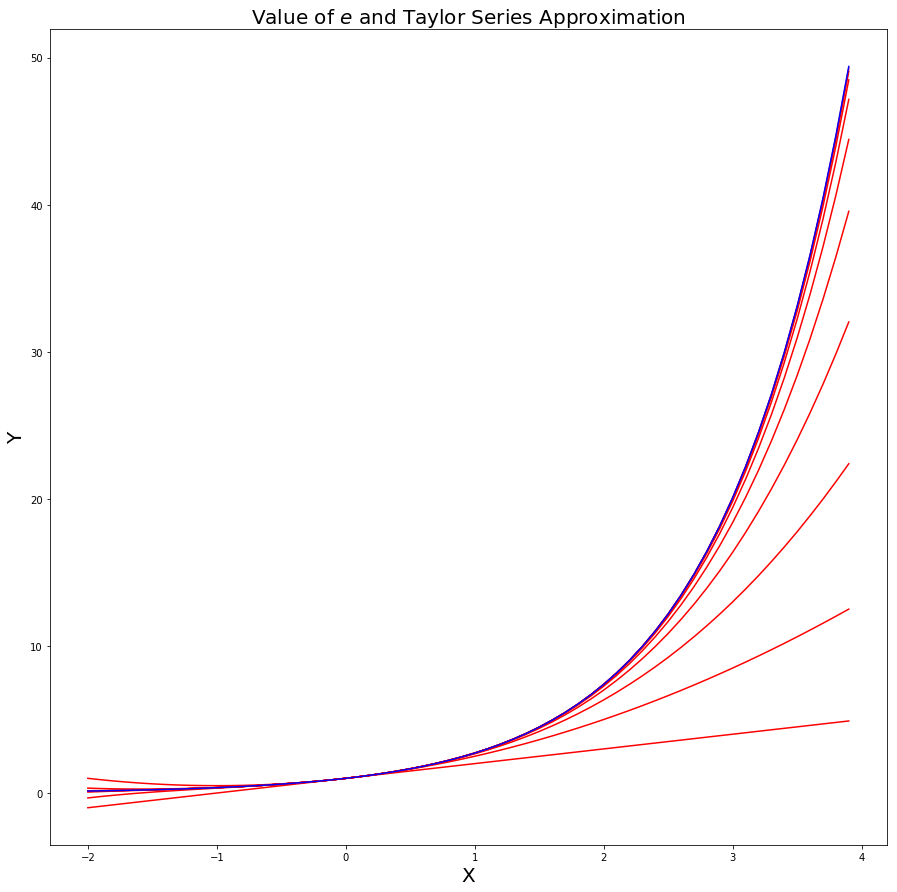

In [18]:
# Let's tail this off with plotting the first 10 taylors derived above (up to ten units in the series)
xs      = np.arange(-2,4,0.1)
ys      = np.exp(xs)
yTaylor = []

plt.figure(figsize=(15,15)),


for taylor_i in taylors[0:10]:
    print("Plotting: ")
    display(taylor_i)
    for xi in xs:
        yTaylor.append( sp.N(taylor_i.subs(x,xi) ) )
    
    plt.plot(xs,yTaylor,color="red")
    yTaylor = []

plt.plot(xs,ys,color = "blue")

plt.title("Value of $e$ and Taylor Series Approximation",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.xlabel("X",fontsize=20)

plt.show()

# Obviously the red lines that get closer to the blue line represent taylor series with more terms. 

Our current implementation is a general one and doesn't take into consideration the structure of the series. With a little creativity, it can be clear how we can linearlize the approximation or use dynamic programming/sub-solutions to make it more efficient. 

I hope this notebook showed you a bit about using the taylor series for numerical function approximation and some considerations of precision and differences between computing a value using sympy's symbolic packages versus the numeric ones. 